In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import sys
sys.path.append('../../rlcoding/')

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Ricycling robot
The story of a robot that collects empty cans in a office...
- **States**: `H` (high energy), `L` (low energy)
- **Actions**:
    - Actions(`H`) = `search`, `wait` 
    - Actions(`L`) = `search`, `wait`, `recharge` 
    
**Transitions and rewards**

| s  |    a     | s' | P(s' \| s, a) | r(s, a, s') |
| :--: | :--------: | :--: | :---------------: | :-----------: |
| `H`  |  `search`  | `H`  |     $\alpha$      | $r_{search}$  |
| `H`  |  `search`  | `L`  |    $1-\alpha$     | $r_{search}$  |
| `L`  |  `search`  | `H`  |     $1-\beta$     |      -3       |
| `L`  |  `search`  | `L`  |      $\beta$      | $r_{search}$  |
| `H`  |   `wait`   | `H`  |         1         |  $r_{wait}$   |
| `H`  |   `wait`   | `L`  |         0         |  $r_{wait}$   |
| `L`  |   `wait`   | `H`  |         0         |  $r_{wait}$   |
| `L`  |   `wait`   | `L`  |         1         |  $r_{wait}$   |
| `L`  | `recharge` | `H`  |         1         |       0       |
| `L`  | `recharge` | `L`  |         0         |       0       |


> Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT press. p. 52

## Init Recycling Robot with some parameters

In [3]:
from mdp.utils import transitions_table, mdp_to_graph, plot_mdp
from mdp.recycling_robot import RecyclingMDP

In [4]:
alpha, beta, r_search, r_wait = .8, .2, 1, -1
mdp = RecyclingMDP(alpha=alpha, beta=beta, r_search=r_search, r_wait=r_wait, gamma=.9)

In [5]:
T = transitions_table(mdp)

In [6]:
T

,from_state,action,to_state,reward,probability
0,L,search,L,1,0.2
1,L,search,H,-3,0.8
2,L,recharge,H,0,1.0
3,L,wait,L,-1,1.0
4,H,search,L,1,0.2
5,H,search,H,1,0.8
6,H,wait,H,-1,1.0


In [7]:
net = plot_mdp(mdp_to_graph(mdp))
net.show('recycling-robot.html')

## Value iteration

In [8]:
from IPython.display import display, clear_output
from mdp.algorithms import value_iteration
from mdp.utils import show_value_iterations

In [9]:
optimal_value, optimal_policy, value_history, policy_history = value_iteration(mdp=mdp, epsilon=1e-10)

In [10]:
optimal_value, optimal_policy

({'L': 7.627118643087306, 'H': 8.47457627020595},
 {'L': 'recharge', 'H': 'search'})

## Q-learning

In [11]:
from algorithms import Qlearning
from utils import show_q_learning, plot_algorithms
from collections import defaultdict
import pandas as pd

In [12]:
Q, history, rewards = Qlearning(mdp, num_episodes=2000)

In [13]:
pd.DataFrame(Q).T

,search,recharge,wait
L,5.208808,7.559976,5.802516
H,8.391428,NaN,6.562328


In [14]:
show_q_learning(history)

,search,recharge,wait
L,0.0,0.0,0.0
H,0.0,NaN,0.0


quit


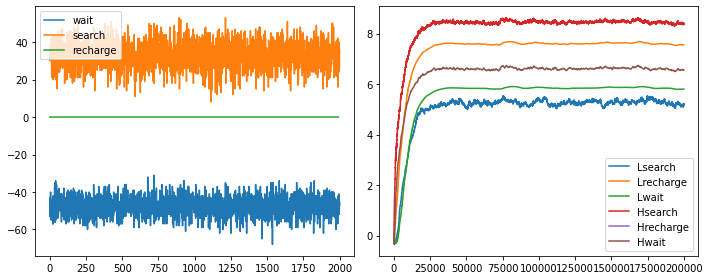

In [15]:
plot_algorithms(history, rewards)

## SARSA

In [16]:
from algorithms import sarsa

In [17]:
Q, history, rewards = sarsa(mdp, num_episodes=2000, max_steps=50, eta=0.04)

In [18]:
pd.DataFrame(Q).T

,search,recharge,wait
L,-3.588741,-1.356326,-3.427091
H,-0.151834,NaN,-1.977600


In [19]:
show_q_learning(history)

,search,recharge,wait
L,0.0,0.0,0.0
H,0.0,NaN,0.0


quit


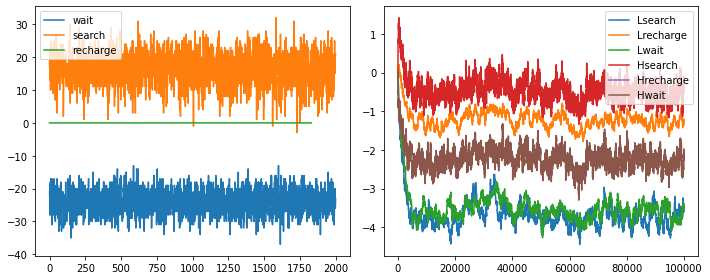

In [20]:
plot_algorithms(history, rewards)

## SARSA($\lambda$)

In [21]:
from algorithms import sarsa_lambda

In [22]:
Q, history, rewards = sarsa_lambda(mdp, num_episodes=2000, max_steps=50, eta=0.04)

In [23]:
pd.DataFrame(Q).T

,search,recharge,wait
L,-3.466881,-1.027319,-3.035756
H,-0.075710,NaN,-1.743804


In [24]:
show_q_learning(history)

,search,recharge,wait
L,-0.073319,-0.114726,-0.071792
H,0.072998,NaN,-0.769500


quit


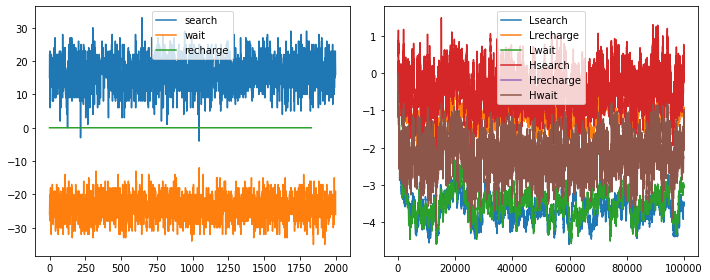

In [25]:
plot_algorithms(history, rewards)